In [1]:
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import sklearn.feature_extraction.text as ft
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, Ridge
from sklearn.metrics import *
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords = set(STOPWORDS)

In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

In [3]:
df_samp = df.sample(20000)

In [4]:
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
df_samp[categories].sum()

toxic            1899
severe_toxic      208
obscene          1052
threat             60
insult            983
identity_hate     204
dtype: int64

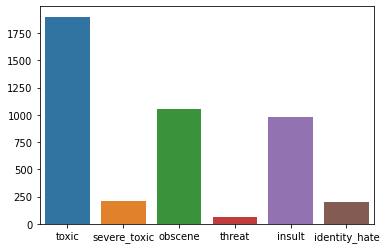

In [5]:
sns.barplot(x=categories,y=df_samp[categories].sum())
plt.show()

In [6]:
wc = WordCloud(background_color='white',
               max_words=100,
               stopwords=stopwords)

In [7]:
def get_words(df,label):
    words = []
    for row in df[df[label]==1].iloc[:]['comment_text']:
        words += clean_text(row)
    return ' '.join(words)

In [8]:
def clean_text(row):
    words = []
    for w in row.split():
        word = re.sub('[^A-Za-z0-9]+', '', str(w))
        words.append(word.lower())
    return words

In [9]:
'''
fig = plt.figure(figsize=(15,10))

for i,l in enumerate(categories):
    wc.generate(get_words(df_samp,l))
    fig.add_subplot(2,3,i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(l)
    plt.axis('off')

fig.tight_layout()
plt.show()
'''

"\nfig = plt.figure(figsize=(15,10))\n\nfor i,l in enumerate(categories):\n    wc.generate(get_words(df_samp,l))\n    fig.add_subplot(2,3,i+1)\n    plt.imshow(wc, interpolation='bilinear')\n    plt.title(l)\n    plt.axis('off')\n\nfig.tight_layout()\nplt.show()\n"

In [10]:
X = df_samp['comment_text']
y = df_samp[categories]
vectorizer = ft.TfidfVectorizer(stop_words=stop_words)
x_train,x_test,y_train,y_test = train_test_split(vectorizer.fit_transform(X),y,test_size=0.2,random_state=42)

In [11]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
#params = {'n_neighbors':[8]}
KNN = KNeighborsClassifier(n_neighbors=8)
#KNN = GridSearchCV(KNN,params)

In [13]:
#KNN_CV.best_estimator_
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [14]:
#params = {'n_estimators':[100]}
RFC = RandomForestClassifier()
#RFC_CV = GridSearchCV(RFC,params)

In [15]:
#RFC_CV.best_estimator_
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
model_names = ['DT','KNN','RFC']
models = [DT,KNN,RFC]
scores = []

for name,model in zip(model_names,models):
    scores.append(model.score(x_test,y_test))

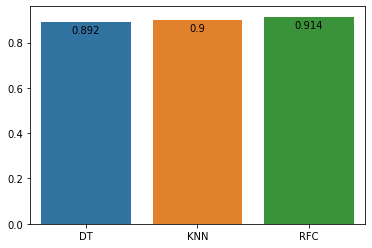

In [17]:
g = sns.barplot(x=model_names,y=scores)
for idx,score in enumerate(scores):#zip(model_names,scores):
    plt.text(idx,score-0.05,round(score,3),ha='center')
plt.show()

In [18]:
best_model = models[scores.index(max(scores))]

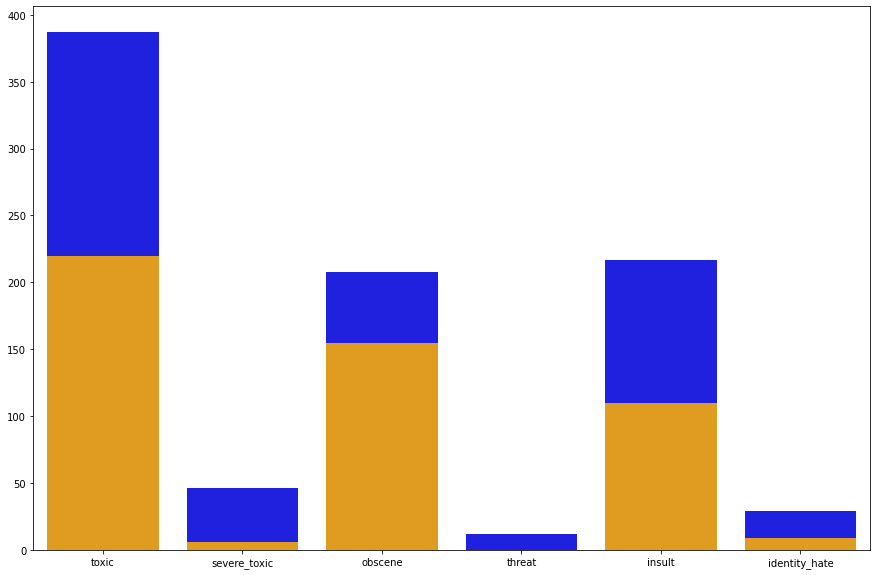

In [19]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=categories,y=y_test[categories].sum(),color='blue')
sns.barplot(x=categories,y=sum(best_model.predict(x_test)),color='orange')
plt.show()

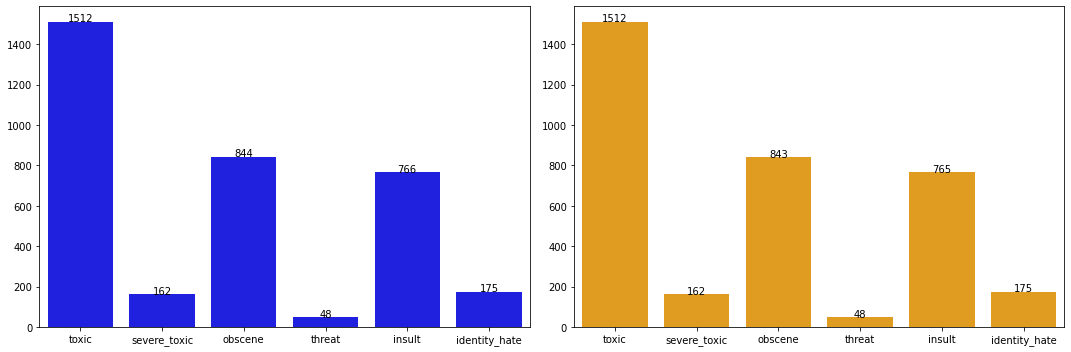

In [20]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
g = sns.barplot(x=categories,y=y_train[categories].sum(),color='blue')
for idx,score in enumerate(y_train[categories].sum()):#zip(model_names,scores):
    g.text(idx,score,round(score,5),ha='center')

fig.add_subplot(1,2,2)
g = sns.barplot(x=categories,y=sum(best_model.predict(x_train)),color='orange')
for idx,score in enumerate(sum(best_model.predict(x_train))):#zip(model_names,scores):
    g.text(idx,score,round(score,5),ha='center')

fig.tight_layout()
plt.show()

In [21]:
X = vectorizer.fit_transform(df['comment_text'])
y = df[categories]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
best_model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
df_test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')

In [24]:
X = vectorizer.transform(df_test['comment_text'])
y = best_model.predict_proba(X)

In [25]:
df_submit = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip')

In [26]:
for idx,cat in enumerate(categories):
    df_submit[cat] = y[idx][:,1]

In [27]:
df_submit.to_csv('submission.csv',index=False)